

```
Рубежный контроль №1 по курсу ТМО
Каркавина Анастасия РТ5-71
вариант 1 сет 4

задание 

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

```



In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.preprocessing import LabelEncoder


<pre style="font-family: 'Arial'">Рассмотрим полученный датасет:</pre>

In [23]:
data = pd.read_csv('https://raw.githubusercontent.com/NastjaK666/uni/master/toy_dataset.csv')
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [24]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [25]:
ClassCoded = data[['City']]
le = LabelEncoder()
data[['City']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['City']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
ClassCoded = data[['Illness']]
le = LabelEncoder()
data[['Illness']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Illness']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
ClassCoded = data[['Gender']]
le = LabelEncoder()
data[['Gender']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['Gender']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<pre style="font-family: 'Arial'">
</pre>

---


<pre style="font-family: 'Arial'">Проверим датасет на наличие пропущенных значений. </pre>

In [28]:
data.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

<pre style="font-family: 'Arial'">Из таблицы выше видно, пропущенных значений нет. </pre>
<pre style="font-family: 'Arial'">Проведём корреляционный анализ. </pre>

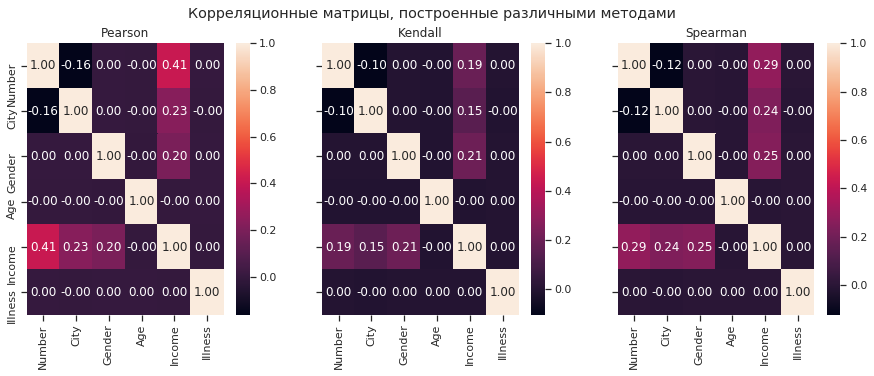

In [29]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

<pre style="font-family: 'Arial'">На основе вышепредставленной тепловой карты корреляции можно сделать вывод,
что целевй признак "Income" зависит от города и пола работающего. 
Рассмотрим графики зависимостей этих признаков от целевого:</pre>

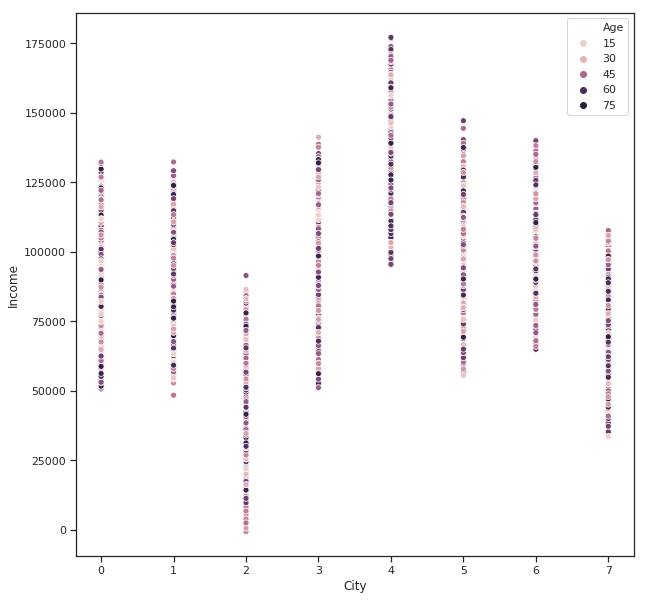

In [31]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='City', y='Income', data=data,  hue='Age')

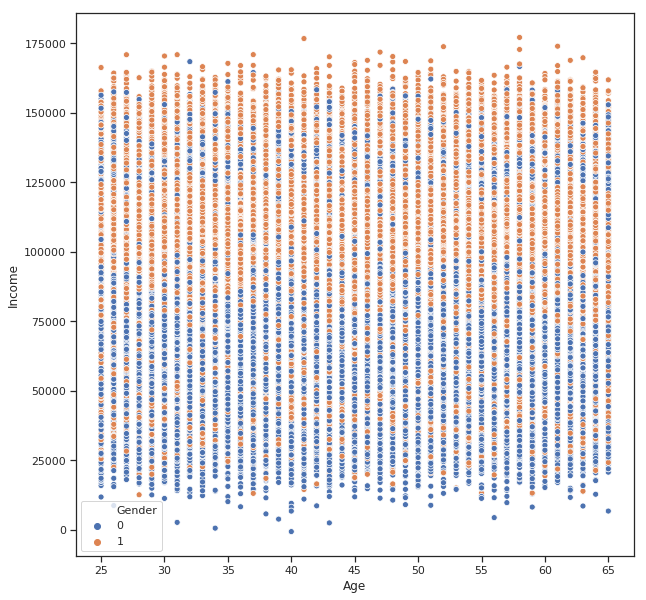

In [33]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Age', y='Income', data=data, hue='Gender')

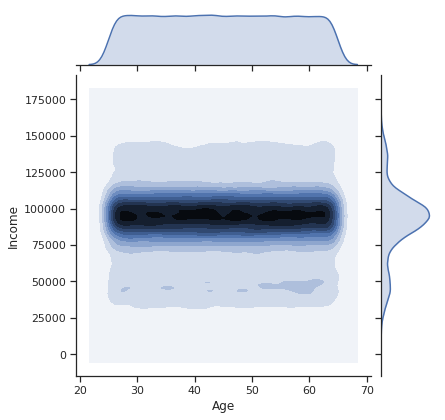

In [34]:
sns.jointplot(x='Age', y='Income', data=data, kind = "kde")

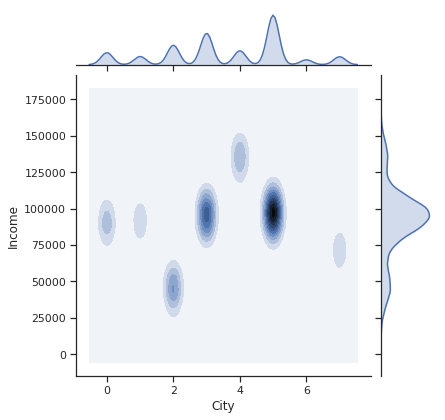

In [35]:
sns.jointplot(x='City', y='Income', data=data, kind = "kde")

<pre style="font-family: 'Arial'">Как видно из вышеуказанных графиков заработная плата зависит от города. Средняя зарплата составляет около 85-110 тысяч не зависимо от возраста. В основном зарплата мужчин выше. Модель обучения строить по существующим данным не рекомендуется, т.к. зависимость зарплаты от наличествующих признаков не явно выражена. Возможный вариант использования категорий город и пол. 

